In [ ]:
import pandas as pd
import numpy as np
import os


from alpha.data.underlying import *
from alpha.factor.alpha_101 import *
from alpha.config.config import *

from alpha.eval.eval import *
from alpha.eval.backtest import *
from alpha.eval.attention_plot import *

# Factor_list

In [2]:
factor_list = ['alphas_101_alpha_035',
               'alphas_101_alpha_038',
               'alphas_101_alpha_040',
               'alphas_101_alpha_043',
               'alphas_101_alpha_045',
               'alphas_101_alpha_049',
               'alphas_101_alpha_051',
               'alphas_101_alpha_053',
               'alphas_101_alpha_055',
               'alphas_101_alpha_060',
               'alphas_101_alpha_085',
               'alphas_101_alpha_001',
               'alphas_101_alpha_002',
               'alphas_101_alpha_003',
               'alphas_101_alpha_004',
               'alphas_101_alpha_006',
               'alphas_101_alpha_007',
               'alphas_101_alpha_008',
               'alphas_101_alpha_009',
               'alphas_101_alpha_010',
               'alphas_101_alpha_012',
               'alphas_101_alpha_013',
               'alphas_101_alpha_014',
               'alphas_101_alpha_015',
               'alphas_101_alpha_016',
               'alphas_101_alpha_017',
               'alphas_101_alpha_018',
               'alphas_101_alpha_019',
               'alphas_101_alpha_020',
               'alphas_101_alpha_021',
               'alphas_101_alpha_022',
               'alphas_101_alpha_023',
               'alphas_101_alpha_024',
               'alphas_101_alpha_026',
               'alphas_101_alpha_028',
               'alphas_101_alpha_029',
               'alphas_101_alpha_030',
               'alphas_101_alpha_031',
               'alphas_101_alpha_033',
               'alphas_101_alpha_034',
               'alphas_101_alpha_037',
               'alphas_101_alpha_039',
               'alphas_101_alpha_044',
               'alphas_101_alpha_046',
               'alphas_101_alpha_052',
               'alphas_101_alpha_054',
               'alphas_101_alpha_068']

### GRU_model

In [3]:
from alpha.model.GRU.scheduler import *
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

/home/chencheng/pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
s_1800 = gru_scheduler(name="gru_0.0.4",
                      train_len=252*4,
                      valid_len=252,
                      look_back_window=10,
                      factor_list=factor_list,
                      universe_version="zz1800",
                      label_df=opn_r,
                      batch_size=1,
                      hidden_size=64,
                      num_layers=1,
                      lr=0.001,
                      weight_decay=0.0001,
                      epochs=50,
                      max_patience=5)
# s_1800.train("20210101", "20221231")

In [6]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:08<00:00, 58.35it/s]


In [8]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.02106196326733036,
 'Rank IC': 0.013612583992390206,
 'ARR': 0.1869878030494284,
 'AV': 0.036432801799142885,
 'Sharpe': 5.132402500370627,
 'WR': 0.639751552795031,
 'MDD': -0.01716476012896173}

### LSTM_model

In [9]:
from alpha.model.LSTM.scheduler import *

In [10]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [13]:
s_1800 = lstm_scheduler(name="lstm_0.0.2",
                       train_len=252*4,
                       valid_len=252,
                       look_back_window=10,
                       factor_list=factor_list,
                       universe_version="zz1800",
                       label_df=opn_r,
                       batch_size=1,
                       hidden_size=64,
                       num_layers=1,
                       lr=0.001,
                       weight_decay=0.0001,
                       epochs=50,
                       max_patience=5)
# s_1800.train("20210101", "20221231")

In [14]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:08<00:00, 56.64it/s]


In [16]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.02547768975272238,
 'Rank IC': 0.021215017376321553,
 'ARR': 0.23558592310531734,
 'AV': 0.03627721721815503,
 'Sharpe': 6.494046158188168,
 'WR': 0.6666666666666666,
 'MDD': -0.013524563514692445}

## Transformer

In [18]:
from alpha.model.Transformer.scheduler import *

In [19]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [22]:
s_1800 = transformer_scheduler(name="transformer_0.0.2",
                              train_len=252*4,
                              valid_len=252,
                              look_back_window=10,
                              factor_list=factor_list,
                              universe_version="zz1800",
                              label_df=opn_r,
                              batch_size=1,
                              hidden_size=128,
                              num_heads=4,
                              lr=0.001,
                              weight_decay=0.0001,
                              epochs=50,
                              max_patience=5)
# s_1800.train("20210101", "20221231")

In [23]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:10<00:00, 47.32it/s]


In [25]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.02271030855586287,
 'Rank IC': 0.03174924890953096,
 'ARR': 0.23603097263413794,
 'AV': 0.04388331834931299,
 'Sharpe': 5.378603567654611,
 'WR': 0.6625258799171843,
 'MDD': -0.026481169185385678}

### GCN_model

In [28]:
from alpha.model.LSTM_GCN.scheduler import *

In [29]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [30]:
s_1800 = lstm_gcn_scheduler(name="gcn_1800",
                           train_len=252*4,
                           valid_len=252,
                           look_back_window=10,
                           factor_list=factor_list,
                           universe_version="zz1800",
                           label_df=opn_r,
                           batch_size=1,
                           hidden_size=64,
                           out_features=64,
                           num_layers=1,
                           lr=0.001,
                           weight_decay=0.0001,
                           epochs=50,
                           max_patience=5)
# s_1800.train("20210101", "20221231")

In [ ]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

 94%|█████████▍| 456/485 [20:58<01:21,  2.82s/it]

In [39]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.034629066397472826,
 'Rank IC': 0.038370673624229454,
 'ARR': 0.33210179140254326,
 'AV': 0.04591942384488113,
 'Sharpe': 7.232272611355168,
 'WR': 0.6915113871635611,
 'MDD': -0.018988619331448242}

### GAT_model

In [40]:
from alpha.model.TGC.scheduler import *

In [41]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [44]:
s_1800 = TGC_scheduler(name="gat_1800",
                      train_len=252*4,
                      valid_len=252,
                      look_back_window=10,
                      factor_list=factor_list,
                      universe_version="zz1800",
                      label_df=opn_r,
                      batch_size=1,
                      hidden_size=64,
                      out_features=64,
                      num_heads=4,
                      num_layers=1,
                      lr=0.001,
                      weight_decay=0.0001,
                      epochs=10,
                      max_patience=2)
# s_1800.train("20210101", "20221231")

In [ ]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

 29%|██▉       | 141/485 [06:17<15:22,  2.68s/it]

In [47]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.03259701332447597,
 'Rank IC': 0.03238575249741988,
 'ARR': 0.3253847154328494,
 'AV': 0.04020976632602524,
 'Sharpe': 8.092181207784051,
 'WR': 0.7080745341614907,
 'MDD': -0.011309316748733922}

### HGNN_model

In [30]:
from alpha.model.HATS.scheduler import *

In [31]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [32]:
s_1800 = hats_scheduler(name="hgnn_1800",
                           train_len=252*4,
                           valid_len=252,
                           look_back_window=10,
                           factor_list=factor_list,
                           universe_version="zz1800",
                           label_df=opn_r,
                           batch_size=1,
                           hidden_size=64,
                           out_features=64,
                           num_layers=1,
                           lr=0.001,
                           weight_decay=0.0001,
                           epochs=50,
                           max_patience=5)
# s_800.train("20210101", "20221231")

In [33]:
loss_1800, ic_1800, df_1800 = s_1800.predict("20210101", "20221231")

100%|██████████| 485/485 [15:28<00:00,  1.91s/it]


In [34]:
create_full_tear_sheet(df_1800.set_index(["date", "stock_id"]))

{'IC': 0.029917245538544312,
 'Rank IC': 0.033432209326551506,
 'ARR': 0.2732441926230253,
 'AV': 0.04900610525479856,
 'Sharpe': 5.575717376484839,
 'WR': 0.6645962732919255,
 'MDD': -0.02577505564315674}

### backtest

In [48]:
from alpha.eval.eval import *
from alpha.eval.backtest import *
from alpha.eval.attention_plot import *

In [49]:
def plot_net_value(profit_series_list, labels, fig_size=(20, 5), title='Net Value Curve', x_label='Date', y_label='Net Value', line_width=1.5):
    """
    画净值曲线函数

    参数：
    profit_series_list: list，包含多个 pd.Series 类型的列表，每个 Series 代表一个净值序列
    fig_size: tuple，画布大小，默认为 (10, 6)
    title: str，图表标题，默认为 'Net Value Curve'
    x_label: str，x轴标签，默认为 'Date'
    y_label: str，y轴标签，默认为 'Net Value'

    返回：
    None
    """
    plt.figure(figsize=fig_size)
    # 遍历每个净值序列，计算其投资组合价值的时间序列数据，然后画出净值曲线
    for i, profit_series in enumerate(profit_series_list):
        net_value_series = profit_series.cumsum()
        plt.plot(net_value_series, label=labels[i], linewidth=line_width, )

    # 添加图例
    # 设置图表属性
    # plt.title(title)
    # plt.xlabel(x_label)
    # plt.ylabel(y_label)
    plt.legend()
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.show()

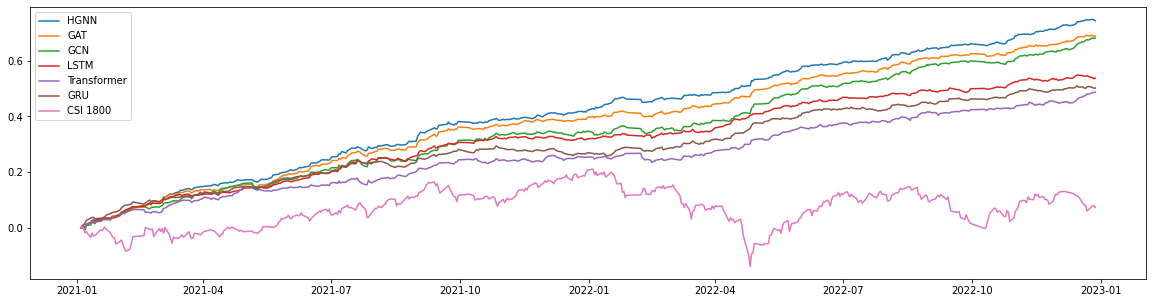

In [52]:
b = BackTest(1000000, 0.001, 0.001)

lstm = pd.read_csv("/home/chencheng/lstm_1800/info_20210101_20221231.csv", index_col=0)
ret_lstm = b.get_daily_pnl(lstm, 0.1)
ret_lstm.index = pd.to_datetime(ret_lstm.index, format="%Y%m%d")


gru = pd.read_csv("/home/chencheng/gru_1800/info_20210101_20221231.csv", index_col=0)
ret_gru = b.get_daily_pnl(gru, 0.1)
ret_gru.index = pd.to_datetime(ret_gru.index, format="%Y%m%d")


ts = pd.read_csv("/home/chencheng/transformer_1800/info_20210101_20221231.csv", index_col=0)
ret_ts = b.get_daily_pnl(ts, 0.1)
ret_ts.index = pd.to_datetime(ret_ts.index, format="%Y%m%d")

gcn = pd.read_csv("/home/chencheng/gcn_1800/info_20210101_20221231.csv", index_col=0)
ret_gcn = b.get_daily_pnl(gcn, 0.1)
ret_gcn.index = pd.to_datetime(ret_gcn.index, format="%Y%m%d")

tgc = pd.read_csv("/home/chencheng/gat_1800/info_20210101_20221231.csv", index_col=0)
ret_tgc = b.get_daily_pnl(tgc, 0.1)
ret_tgc.index = pd.to_datetime(ret_tgc.index, format="%Y%m%d")

hats = pd.read_csv("/home/chencheng/hgnn_1800/info_20210101_20221231.csv", index_col=0)
ret_hats = b.get_daily_pnl(hats, 0.1)
ret_hats.index = pd.to_datetime(ret_hats.index, format="%Y%m%d")


zz1800 = gru.groupby("date")["ret"].mean().shift(1).fillna(0)
zz1800.index = pd.to_datetime(zz800.index, format="%Y%m%d")

plot_net_value([ret_hats, ret_tgc, ret_gcn, ret_lstm, ret_ts, ret_gru, zz1800], ["HGNN", "GAT", "GCN", "LSTM", "Transformer", "GRU", "CSI 1800"])